In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('transaction items.csv')

In [3]:
df.head()

,Time,Register Name/Number,Cashier Name,Operation Type,Store Code,UPC,Line Item,Department,Category,Supplier,...,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Transaction ID,Customer ID
0,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000009773,*074265013280,ZIYAD HALVA /VANILLA,general,general,not tracked,...,4.99,1.0,0.0,4.99,0.0,4.99,0.0,4.99,6B3FCFA1-DAE7-4FE3-8764-9C6141D53256,54861335
1,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000000428,*,Aladdin Bowl,Cafe,Aladdins Bowls,not tracked,...,12.99,1.0,0.0,12.99,0.0,12.99,0.0,12.99,33EEC9A4-0917-4DF9-B870-E46B39E58ED9,54861335
2,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000000084,*,Baklava Square,Cafe,Desserts,not tracked,...,2.25,1.0,0.0,2.25,0.0,2.25,0.0,2.25,33EEC9A4-0917-4DF9-B870-E46B39E58ED9,54861335
3,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000008936,*,Lunch box special,general,general,not tracked,...,10.99,1.0,0.0,10.99,0.0,10.99,0.0,10.99,33EEC9A4-0917-4DF9-B870-E46B39E58ED9,54861335
4,03/13/2023 04:26 PM,Register 2,Dominic A,SALE,*400000007496,*,Specialty Retail Store,Retail Store,general,not tracked,...,2.50,4.0,0.0,10.00,0.0,10.00,0.0,10.00,11046549-D002-411D-B9FC-994902E8DC16,54861335


In [4]:
df_ws = df.loc[df['Line Item'] == 'Alad. Large Plain WS']

In [5]:
df = df.loc[(df["Line Item"] == 'Alad. Large Plain') | (df['Line Item'] == 'Lunch box special') | (df['Category'] == 'Stuffed Pita Sandwiches')]

In [6]:
def pita_package_count(row):
    if row['Category'] == 'Stuffed Pita Sandwiches' or row['Line Item'] == 'Lunch box special':
        return row['Quantity']/5
    else:
        return row['Quantity']

In [7]:
df['pita count'] = df.apply(pita_package_count,axis=1)

df_ws['pita count'] = df_ws.apply(pita_package_count,axis=1)

In [8]:
df.head(20)

,Time,Register Name/Number,Cashier Name,Operation Type,Store Code,UPC,Line Item,Department,Category,Supplier,...,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Transaction ID,Customer ID,pita count
3,03/13/2023 04:42 PM,Register 2,Dominic A,SALE,*400000008936,*,Lunch box special,general,general,not tracked,...,1.0,0.0,10.99,0.0,10.99,0.0,10.99,33EEC9A4-0917-4DF9-B870-E46B39E58ED9,54861335,0.2
12,03/13/2023 04:24 PM,Register 2,Dominic A,SALE,*400000000343,*,Falafel Sandwich (Vegetarian),Cafe,Stuffed Pita Sandwiches,not tracked,...,1.0,0.0,7.99,0.0,7.99,0.0,7.99,57B1276C-0C1B-4DD8-A2AC-63053635D3B8,54861335,0.2
16,03/13/2023 04:20 PM,Register 2,Dominic A,SALE,*400000000305,*,Chicken Shawarma,Cafe,Stuffed Pita Sandwiches,not tracked,...,1.0,0.0,8.99,0.0,8.99,0.0,8.99,43D79AC2-5BD8-45AD-83F4-204B95851517,54861335,0.2
28,03/13/2023 04:09 PM,Register 2,Dominic A,SALE,*400000000305,*,Chicken Shawarma,Cafe,Stuffed Pita Sandwiches,not tracked,...,2.0,0.0,17.98,0.0,17.98,0.0,17.98,FFEDA654-27DA-4EE3-AE9E-04DC9E4C248F,54861335,0.4
31,03/13/2023 04:03 PM,Register 2,Dominic A,SALE,*400000000336,*,Gyro Sandwich,Cafe,Stuffed Pita Sandwiches,not tracked,...,1.0,0.0,8.99,0.0,8.99,0.0,8.99,6F9B2F9B-3D76-45A4-8087-A17F58C428A4,54861335,0.2
35,03/13/2023 03:57 PM,Register 2,Dominic A,SALE,*400000000305,*,Chicken Shawarma,Cafe,Stuffed Pita Sandwiches,not tracked,...,2.0,0.0,17.98,0.0,17.98,0.0,17.98,CF7CC33B-5A05-4DBD-B9CC-5293678C15A4,54861335,0.4
36,03/13/2023 03:49 PM,Register 2,Dominic A,SALE,*400000001012,*073998126700,Alad. Large Plain,Retail Store,Bread,not tracked,...,4.0,0.0,7.20,0.0,7.20,0.0,7.20,26FBC13B-6AAC-41B1-8450-6AABC3DC93C7,54861335,4.0
67,03/13/2023 03:14 PM,Register 2,Dominic A,SALE,*400000000305,*,Chicken Shawarma,Cafe,Stuffed Pita Sandwiches,not tracked,...,2.0,0.0,17.98,0.0,17.98,0.0,17.98,E51500F6-E167-4886-837F-B01BFA3160D8,54861335,0.4
84,03/13/2023 02:53 PM,Register 2,Dominic A,SALE,*400000001012,*073998126700,Alad. Large Plain,Retail Store,Bread,not tracked,...,2.0,0.0,3.60,0.0,3.60,0.0,3.60,F9A681E6-3F3A-4217-96BB-AEEB6B7906C8,54861335,2.0
87,03/13/2023 02:53 PM,Register 2,Dominic A,SALE,*400000000336,*,Gyro Sandwich,Cafe,Stuffed Pita Sandwiches,not tracked,...,1.0,0.0,8.99,0.0,8.99,0.0,8.99,F9A681E6-3F3A-4217-96BB-AEEB6B7906C8,54861335,0.2


In [9]:
def unit_cost(row):
    if row['Category'] == 'Stuffed Pita Sandwiches' or row['Line Item'] == 'Lunch box special':
        return 0
    else:
        return round(row['Total Due']/row['Quantity'],2)

df['unit cost'] = df.apply(unit_cost,axis=1)

df_ws['unit cost'] = df_ws.apply(unit_cost,axis=1)

In [10]:
df['unit cost'].value_counts()

 0.00    31826
 1.45     5106
 1.80     3096
 1.60     2595
 1.44       81
 1.30       72
 1.62       68
 1.16       49
 1.31       25
-1.80        8
-1.45        4
 1.23        2
 1.27        1
 1.26        1
 1.77        1
 1.38        1
 1.52        1
 1.17        1
 0.90        1
 1.01        1
 1.48        1
 1.02        1
 1.28        1
 1.71        1
-1.60        1
Name: unit cost, dtype: int64

In [11]:
df_ws['unit cost'].value_counts()

 1.32    325
 1.20    139
 1.55    132
 1.19      5
 1.08      3
-1.32      1
 0.20      1
 0.98      1
 1.28      1
 1.39      1
 1.24      1
Name: unit cost, dtype: int64

In [12]:
df_ws.loc[df_ws['unit cost'] == -1.32]

,Time,Register Name/Number,Cashier Name,Operation Type,Store Code,UPC,Line Item,Department,Category,Supplier,...,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Transaction ID,Customer ID,pita count,unit cost
105321,08/27/2022 02:26 PM,Register 2,Dominic A,RETURN,*400000000251,*,Alad. Large Plain WS,WholeSale,Bread,not tracked,...,0.0,-6.6,0.0,-6.6,0.0,-6.6,D6F0F52D-9A68-42A6-B4A0-CD074D783A75,54861335,5.0,-1.32


In [13]:
df = df.loc[df['pita count']<=54]

df_ws = df_ws.loc[df_ws['pita count']<=54]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42937 entries, 3 to 429939
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  42937 non-null  object 
 1   Register Name/Number  42937 non-null  object 
 2   Cashier Name          42937 non-null  object 
 3   Operation Type        42937 non-null  object 
 4   Store Code            42937 non-null  object 
 5   UPC                   42937 non-null  object 
 6   Line Item             42937 non-null  object 
 7   Department            42937 non-null  object 
 8   Category              42937 non-null  object 
 9   Supplier              42937 non-null  object 
 10  Supplier Code         0 non-null      float64
 11  Cost                  42937 non-null  float64
 12  Price                 42937 non-null  float64
 13  Quantity              42937 non-null  float64
 14  Modifiers             42937 non-null  float64
 15  Subtotal          

In [15]:
df['date'] = pd.to_datetime(df['Time'])

df_ws['date'] = pd.to_datetime(df_ws['Time'])

In [16]:
df.set_index('date',inplace=True)

df_ws.set_index('date',inplace=True)

In [17]:
df_daily = df['pita count'].resample('D').sum()

df_ws_daily = df_ws['pita count'].resample('D').sum()

In [18]:
df_daily.to_csv('large_white_plain_sales.csv')

df_ws_daily.to_csv('large_white_plain_ws_sales.csv')

In [19]:
df_daily.head()

date
2021-01-12      0.2
2021-01-13      1.4
2021-01-14     47.0
2021-01-15     58.8
2021-01-16    164.4
Freq: D, Name: pita count, dtype: float64

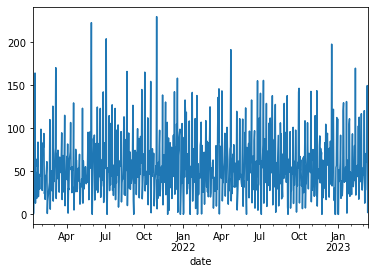

In [20]:
df_daily.plot();

In [21]:
index = pd.date_range(start='1/1/2021',end='12/31/2023')

In [22]:
index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=1095, freq='D')

In [23]:
df_daily = df_daily.reindex(index)

df_ws_daily = df_ws_daily.reindex(index)

In [24]:
df_daily.head()

2021-01-01   NaN
2021-01-02   NaN
2021-01-03   NaN
2021-01-04   NaN
2021-01-05   NaN
Freq: D, Name: pita count, dtype: float64

In [25]:
df_daily.sort_values(ascending=False)[:10]

2021-10-30    230.0
2021-05-29    223.0
2021-07-03    204.2
2022-12-17    198.0
2022-04-23    191.6
2021-03-06    170.6
2023-02-11    170.0
2021-08-21    166.2
2021-10-02    165.4
2021-01-16    164.4
Name: pita count, dtype: float64

In [26]:
df_daily.describe()

count    791.000000
mean      56.664475
std       35.992689
min        0.000000
25%       33.200000
50%       49.800000
75%       73.400000
max      230.000000
Name: pita count, dtype: float64

In [27]:
df_ws_daily.sort_values(ascending=False)[:10]

2022-09-16    120.0
2022-10-14    115.0
2023-02-09    113.0
2022-11-11    104.0
2023-02-24     98.0
2023-02-08     94.0
2022-10-24     92.0
2022-09-23     90.0
2022-12-07     89.0
2023-02-15     89.0
Name: pita count, dtype: float64

In [28]:
df_ws_daily.describe()

count    791.000000
mean      15.815424
std       21.741084
min        0.000000
25%        0.000000
50%        0.000000
75%       25.000000
max      120.000000
Name: pita count, dtype: float64

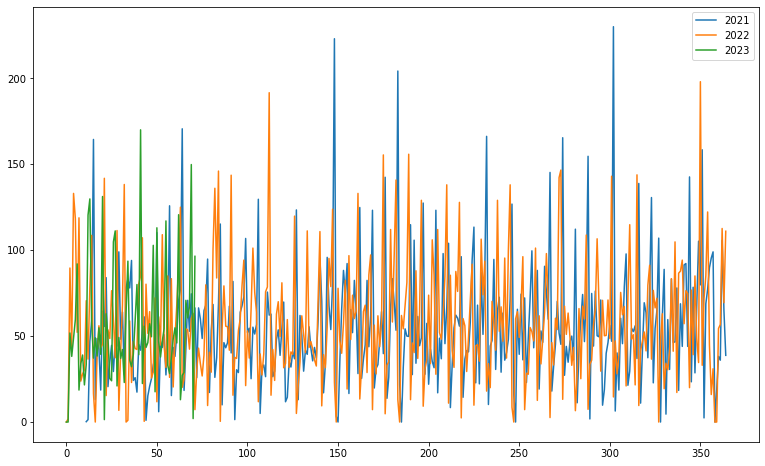

In [29]:
year_groups = df_daily.groupby(pd.Grouper(freq='A'))
pita_annual = pd.DataFrame()
for yr,group in year_groups:
    pita_annual[yr.year] = group.values.ravel()
pita_annual.plot(figsize=(13,8),subplots=False,legend=True);

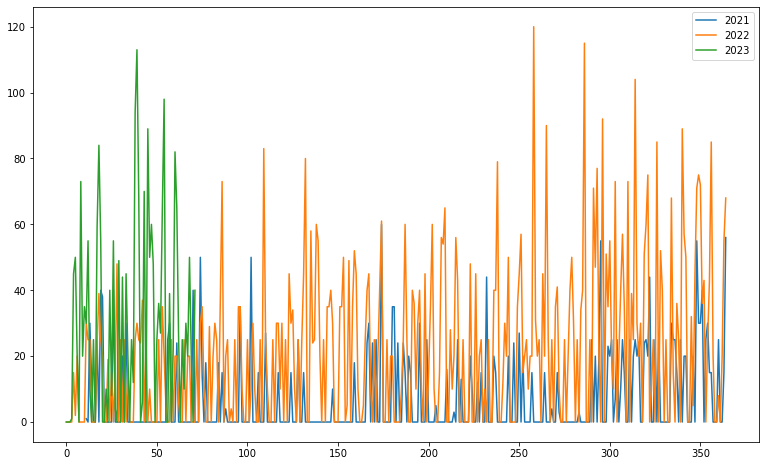

In [30]:
year_groups = df_ws_daily.groupby(pd.Grouper(freq='A'))
pita_annual = pd.DataFrame()
for yr,group in year_groups:
    pita_annual[yr.year] = group.values.ravel()
pita_annual.plot(figsize=(13,8),subplots=False,legend=True);

In [31]:
df_daily.head(20)

2021-01-01      NaN
2021-01-02      NaN
2021-01-03      NaN
2021-01-04      NaN
2021-01-05      NaN
2021-01-06      NaN
2021-01-07      NaN
2021-01-08      NaN
2021-01-09      NaN
2021-01-10      NaN
2021-01-11      NaN
2021-01-12      0.2
2021-01-13      1.4
2021-01-14     47.0
2021-01-15     58.8
2021-01-16    164.4
2021-01-17     13.0
2021-01-18     48.6
2021-01-19     42.4
2021-01-20     18.6
Freq: D, Name: pita count, dtype: float64

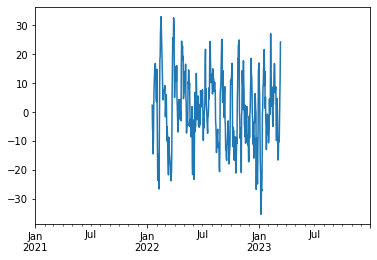

In [32]:
df_daily.rolling(7).mean().diff(365).plot();

In [33]:
df_daily_na = df_daily.dropna()

df_ws_daily_na = df_ws_daily.dropna()

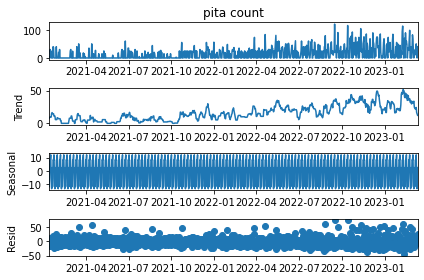

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_ws_daily_na, model='additive',extrapolate_trend='freq')
result.plot()
plt.show()

# Prophet

In [35]:
df_daily_prophet = df_ws_daily_na.reset_index()

In [36]:
df_daily_prophet.head()

,index,pita count
0,2021-01-12,1.0
1,2021-01-13,0.0
2,2021-01-14,30.0
3,2021-01-15,12.0
4,2021-01-16,0.0


In [37]:
df_daily_prophet.rename(columns={'index':'ds','pita count':'y'},inplace=True)

In [38]:
df_daily_prophet.head()

,ds,y
0,2021-01-12,1.0
1,2021-01-13,0.0
2,2021-01-14,30.0
3,2021-01-15,12.0
4,2021-01-16,0.0


In [39]:
df_daily_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      791 non-null    datetime64[ns]
 1   y       791 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.5 KB


In [40]:
df_daily_prophet.loc[df_daily_prophet['ds'] == df_daily_prophet['ds'].max()].index[0]*0.8

632.0

In [41]:
df_daily_prophet['ds'].iloc[632]

Timestamp('2022-10-06 00:00:00')

In [42]:
train = df_daily_prophet.iloc[:633]
test = df_daily_prophet[633:]

In [43]:
df_daily_prophet.loc[df_daily_prophet['ds'] == '2023-01-12']

,ds,y
730,2023-01-12,30.0


In [44]:
train_full = df_daily_prophet[:731]
test_full = df_daily_prophet[731:]

In [45]:
train_full.tail()

,ds,y
726,2023-01-08,0.0
727,2023-01-09,73.0
728,2023-01-10,20.0
729,2023-01-11,35.0
730,2023-01-12,30.0


In [46]:
!pip install fbprophet

In [47]:
import fbprophet

In [48]:
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [49]:
from fbprophet import Prophet

In [50]:
ramadan = pd.DataFrame({
  'holiday': 'ramadan',
  'ds': pd.to_datetime(['2021-04-12','2022-04-01','2023-03-22']),
  'lower_window': 0,
  'upper_window': 29,
})

In [51]:
model = Prophet(holidays=ramadan,changepoint_range=1)
model.add_country_holidays(country_name = 'US')

In [52]:
model.fit(train_full)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
model.train_holiday_names

0                         ramadan
1                  New Year's Day
2       New Year's Day (Observed)
3      Martin Luther King Jr. Day
4           Washington's Birthday
5                    Memorial Day
6                Independence Day
7     Independence Day (Observed)
8                       Labor Day
9                    Columbus Day
10                   Veterans Day
11                   Thanksgiving
12                  Christmas Day
13       Christmas Day (Observed)
14        Veterans Day (Observed)
dtype: object

In [54]:
train_dates = pd.DataFrame(train_full['ds'])
train_dates

,ds
0,2021-01-12
1,2021-01-13
2,2021-01-14
3,2021-01-15
4,2021-01-16
...,...
726,2023-01-08
727,2023-01-09
728,2023-01-10
729,2023-01-11


In [55]:
train_forecast = model.predict(train_dates)

In [56]:
print(train_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 2021-01-12  -9.109184  -30.511631   10.452809
1 2021-01-13   9.124055  -12.028379   26.937644
2 2021-01-14   9.601794   -9.677719   29.227773
3 2021-01-15  14.836827   -6.181231   33.321868
4 2021-01-16  -1.113383  -21.091852   18.854469


In [57]:
train_wholesale = train_full.merge(train_forecast[['ds','yhat']],on='ds')

In [58]:
train_wholesale.to_csv('train_wholesale.csv')

In [59]:
train_wholesale.tail()

,ds,y,yhat
726,2023-01-08,0.0,16.365128
727,2023-01-09,73.0,32.909169
728,2023-01-10,20.0,18.349431
729,2023-01-11,35.0,36.471759
730,2023-01-12,30.0,36.867666


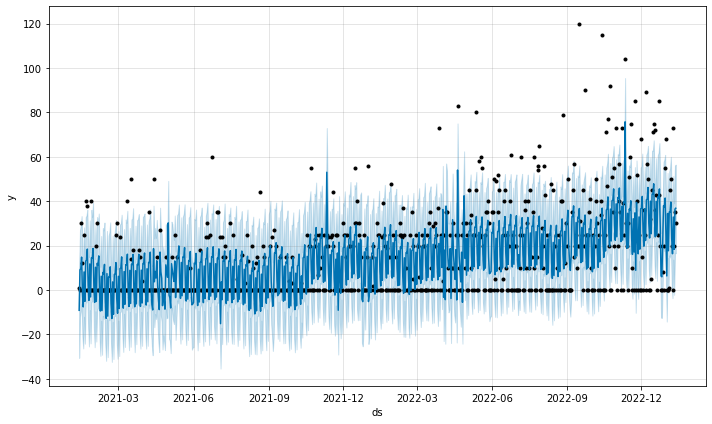

In [60]:
model.plot(train_forecast)
plt.show()

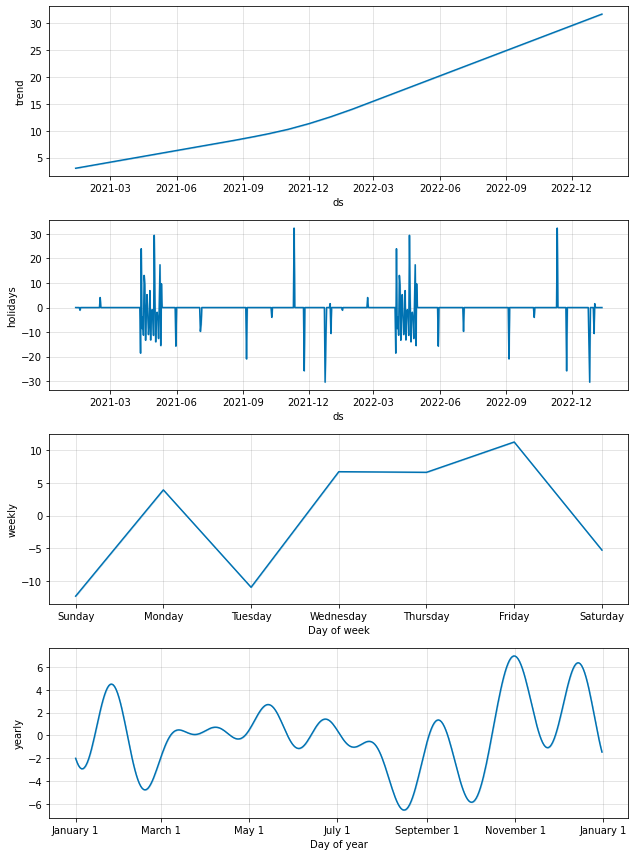

In [61]:
model.plot_components(train_forecast)
plt.show()

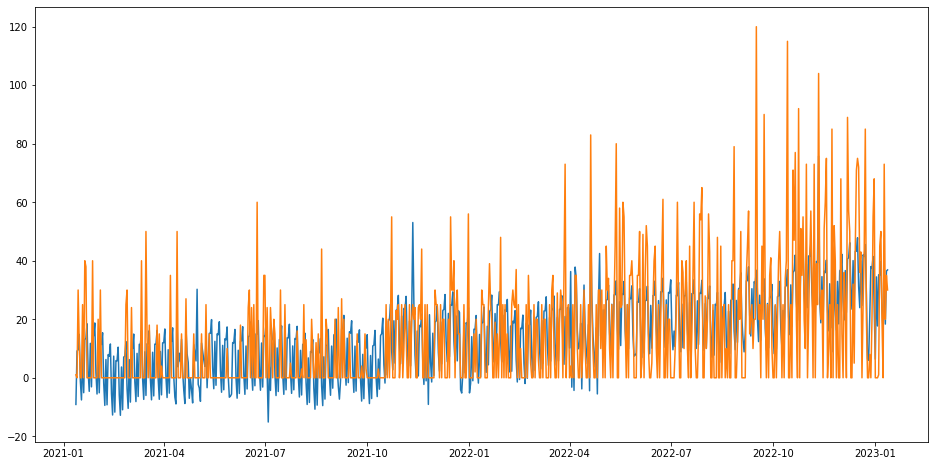

In [62]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(train_full['ds'],train_forecast['yhat'])
ax.plot(train_full['ds'],train_full['y'])
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_full['y'],train_forecast['yhat'],squared=False)

15.322981447198408

In [64]:
test_dates = pd.DataFrame(test_full['ds'])

In [65]:
test_forecast = model.predict(test_dates)

In [66]:
print(test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 2023-01-13  42.052362   23.202439   61.096899
1 2023-01-14  26.085002    5.680272   46.464775
2 2023-01-15  19.642269   -1.239586   40.347390
3 2023-01-16  35.425090   15.953143   55.242780
4 2023-01-17  22.253840    4.846614   43.214394


In [67]:
test_wholesale = test_full.merge(test_forecast[['ds','yhat']],on='ds')

In [68]:
test_wholesale.to_csv('test_wholesale.csv')

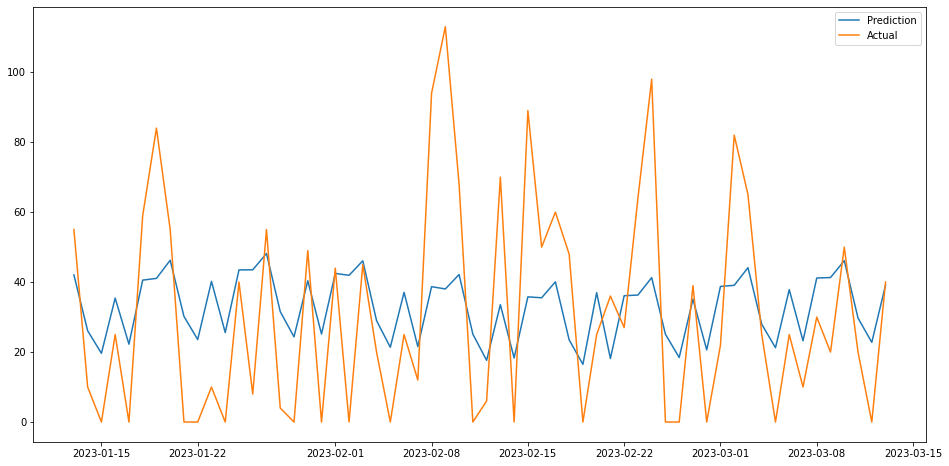

In [69]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(test_full['ds'],test_forecast['yhat'],label='Prediction')
ax.plot(test_full['ds'],test_full['y'],label='Actual')
ax.legend()
plt.show()

In [70]:
mean_squared_error(test_full['y'],test_forecast['yhat'],squared=False)

25.568404254274853

In [71]:
future = model.make_future_dataframe(periods=353)[790:]
future.head()

,ds
790,2023-03-13
791,2023-03-14
792,2023-03-15
793,2023-03-16
794,2023-03-17


In [72]:
future.tail()

,ds
1079,2023-12-27
1080,2023-12-28
1081,2023-12-29
1082,2023-12-30
1083,2023-12-31


In [73]:
final_model = Prophet(holidays=ramadan,changepoint_range=1)
final_model.add_country_holidays(country_name = 'US')

In [74]:
final_model.fit(df_daily_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
future_forecast = final_model.predict(future)

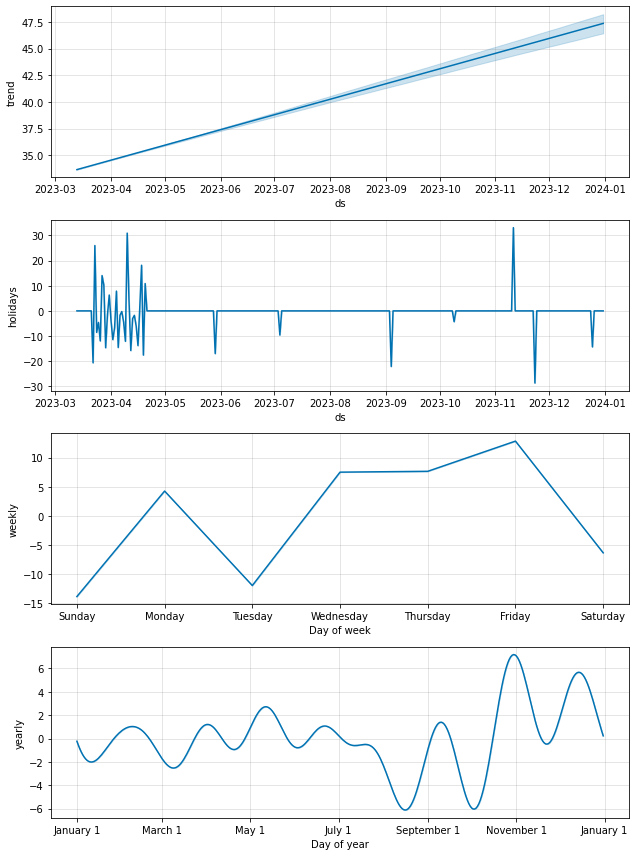

In [76]:
final_model.plot_components(future_forecast)
plt.show()

In [77]:
print(future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 2023-03-13  35.587616   15.436159   57.035880
1 2023-03-14  19.510643   -1.280419   39.290765
2 2023-03-15  39.210965   19.005376   60.295319
3 2023-03-16  39.578918   19.454003   61.206998
4 2023-03-17  45.019039   26.081352   66.121121


In [78]:
future_wholesale = future_forecast[['ds','yhat']]

In [79]:
future_wholesale.to_csv('future_wholesale.csv')

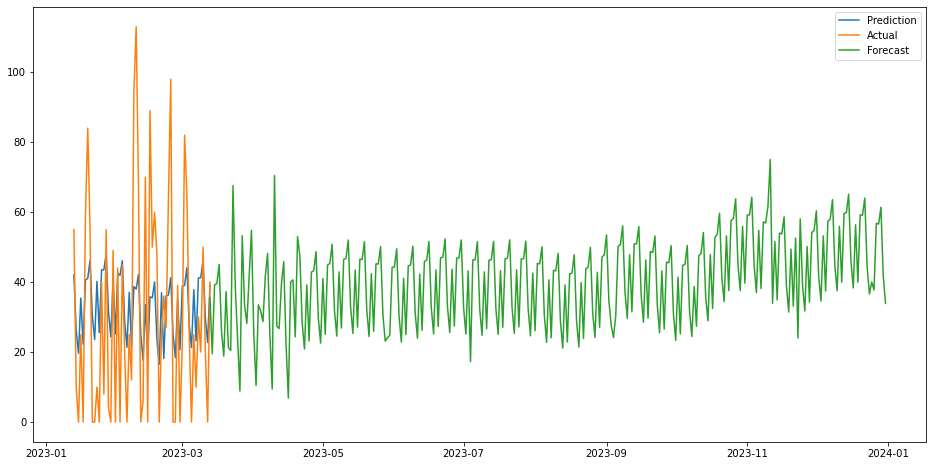

In [80]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(test_full['ds'],test_forecast['yhat'],label='Prediction')
ax.plot(test_full['ds'],test_full['y'],label='Actual')
ax.plot(future['ds'],future_forecast['yhat'],label='Forecast')
ax.legend()
plt.show()

# Multiple Regressors Model

In [81]:
df_weather = pd.read_csv('weather.csv')

In [82]:
df_weather.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,WSF2,WT01,WT02,WT03,WT04,WT06,WT08,WT09
0,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-01,7.38,0.84,0.0,31,41,16.1,1.0,NaN,NaN,1.0,1.0,NaN,NaN
1,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-02,9.40,0.03,0.0,37,43,28.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-03,5.82,0.06,0.0,37,41,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-04,4.25,0.03,0.2,34,35,8.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-05,4.47,0.01,0.0,33,35,10.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
weather_list = df_weather.columns
weather_list

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'WSF2', 'WT01', 'WT02', 'WT03', 'WT04', 'WT06', 'WT08', 'WT09'],
      dtype='object')

In [84]:
weather_names = ['station','name','date','avg wind','precip','snowfall','avg temp','max temp','max wind','fog','heavy fog','thunder','pellets','rime','haze','blowing snow']

In [85]:
weather_dict = dict(zip(weather_list,weather_names))

In [86]:
df_weather = df_weather.rename(weather_dict,axis=1)

In [87]:
df_weather.head()

,station,name,date,avg wind,precip,snowfall,avg temp,max temp,max wind,fog,heavy fog,thunder,pellets,rime,haze,blowing snow
0,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-01,7.38,0.84,0.0,31,41,16.1,1.0,NaN,NaN,1.0,1.0,NaN,NaN
1,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-02,9.40,0.03,0.0,37,43,28.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-03,5.82,0.06,0.0,37,41,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-04,4.25,0.03,0.2,34,35,8.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",2021-01-05,4.47,0.01,0.0,33,35,10.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_weather['date'] = pd.to_datetime(df_weather['date'])

In [89]:
df_weather.set_index('date',inplace=True)

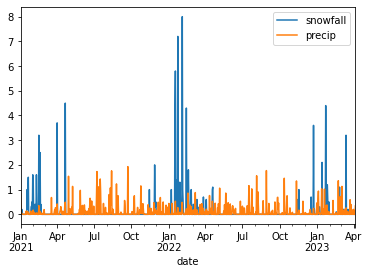

In [90]:
df_weather[['snowfall','precip']].plot();

In [91]:
df_weather = df_weather[['max temp','precip','snowfall']]

In [92]:
df_weather.head()

,max temp,precip,snowfall
date,,,
2021-01-01,41,0.84,0.0
2021-01-02,43,0.03,0.0
2021-01-03,41,0.06,0.0
2021-01-04,35,0.03,0.2
2021-01-05,35,0.01,0.0


In [93]:
df_weather.tail()

,max temp,precip,snowfall
date,,,
2023-04-01,63,0.16,0.0
2023-04-02,45,0.00,0.0
2023-04-03,68,0.00,0.0
2023-04-04,71,0.00,0.0
2023-04-05,79,0.34,0.0


In [94]:
df_games = pd.read_csv('guards_games.csv')

In [95]:
df_games.head()

,Unnamed: 0,Attendance
0,2021-01-01,0.0
1,2021-01-02,0.0
2,2021-01-03,0.0
3,2021-01-04,0.0
4,2021-01-05,0.0


In [96]:
df_games = df_games.rename({'Unnamed: 0': 'date'},axis=1)

In [97]:
df_games['date'] = pd.to_datetime(df_games['date'])
df_games.set_index('date',inplace=True)

In [98]:
df_regressors = pd.concat([df_weather,df_games],axis=1)

In [99]:
df_regressors.head()

,max temp,precip,snowfall,Attendance
date,,,,
2021-01-01,41.0,0.84,0.0,0.0
2021-01-02,43.0,0.03,0.0,0.0
2021-01-03,41.0,0.06,0.0,0.0
2021-01-04,35.0,0.03,0.2,0.0
2021-01-05,35.0,0.01,0.0,0.0


In [100]:
df_regressors.tail()

,max temp,precip,snowfall,Attendance
date,,,,
2023-12-27,NaN,NaN,NaN,0.0
2023-12-28,NaN,NaN,NaN,0.0
2023-12-29,NaN,NaN,NaN,0.0
2023-12-30,NaN,NaN,NaN,0.0
2023-12-31,NaN,NaN,NaN,0.0


In [101]:
df_regressors = df_regressors['2021-01-12':]
df_regressors.reset_index(inplace=True)

In [102]:
df_regressors = df_regressors.rename({'date':'ds'},axis=1)

In [103]:
df_regressors.head()

,ds,max temp,precip,snowfall,Attendance
0,2021-01-12,31.0,0.00,0.0,0.0
1,2021-01-13,47.0,0.00,0.0,0.0
2,2021-01-14,46.0,0.01,0.0,0.0
3,2021-01-15,43.0,0.13,0.1,0.0
4,2021-01-16,34.0,0.01,0.0,0.0


In [104]:
df_modreg = df_daily_prophet.merge(df_regressors,on='ds')

In [105]:
df_modreg.head()

,ds,y,max temp,precip,snowfall,Attendance
0,2021-01-12,1.0,31.0,0.00,0.0,0.0
1,2021-01-13,0.0,47.0,0.00,0.0,0.0
2,2021-01-14,30.0,46.0,0.01,0.0,0.0
3,2021-01-15,12.0,43.0,0.13,0.1,0.0
4,2021-01-16,0.0,34.0,0.01,0.0,0.0


In [106]:
df_modreg.tail()

,ds,y,max temp,precip,snowfall,Attendance
786,2023-03-09,20.0,40.0,0.00,0.0,0.0
787,2023-03-10,50.0,37.0,0.19,0.2,0.0
788,2023-03-11,20.0,34.0,0.00,0.0,0.0
789,2023-03-12,0.0,37.0,0.00,0.0,0.0
790,2023-03-13,40.0,36.0,0.26,3.2,0.0


In [107]:
#df_modreg['cap'] = 350
#df_modreg['floor'] = 0

In [108]:
train_full = df_modreg[:731]
test_full = df_modreg[731:]

In [109]:
test_dates = test_full.drop('y',axis=1)

param_grid = {  
'changepoint_prior_scale': [0.005, 0.05, 0.5],
'seasonality_prior_scale': [0.1, 1.0, 10.0],
'holidays_prior_scale': [0.1, 1.0, 10.0],
#'seasonality_mode': ['multiplicative', 'additive'],
#'growth': ['linear', 'logistic','flat'],
#'yearly_seasonality':[5,10,15],
#'weekly_seasonality':[3,5,7],
'n_changepoints': [20,25,30],
'changepoint_range': [1],
'holidays': [ramadan],
}

import itertools

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params,daily_seasonality=False)
    model.add_country_holidays(country_name = 'US')
    model.add_regressor('max temp')
    model.add_regressor('precip')
    model.add_regressor('snowfall')
    model.add_regressor('Attendance')
    model.fit(train_full)  # Fit model with given params
    test_forecast = model.predict(test_dates)
    rmse = mean_squared_error(test_full['y'],test_forecast['yhat'],squared=False)
    rmses.append(rmse)

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

best_params = all_params[np.argmin(rmses)]
print(best_params)

In [110]:
model = Prophet(holidays=ramadan,changepoint_range = 1)
model.add_country_holidays(country_name = 'US')
model.add_regressor('max temp')
model.add_regressor('precip')
model.add_regressor('snowfall')
model.add_regressor('Attendance')

In [111]:
model.fit(train_full)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [112]:
train_dates = train_full.drop('y',axis=1)
train_dates

,ds,max temp,precip,snowfall,Attendance
0,2021-01-12,31.0,0.00,0.0,0.0
1,2021-01-13,47.0,0.00,0.0,0.0
2,2021-01-14,46.0,0.01,0.0,0.0
3,2021-01-15,43.0,0.13,0.1,0.0
4,2021-01-16,34.0,0.01,0.0,0.0
...,...,...,...,...,...
726,2023-01-08,37.0,0.00,0.0,0.0
727,2023-01-09,36.0,0.00,0.0,0.0
728,2023-01-10,44.0,0.00,0.0,0.0
729,2023-01-11,50.0,0.03,0.0,0.0


In [113]:
train_forecast = model.predict(train_dates)

In [114]:
print(train_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 2021-01-12  -8.266500  -27.320909   11.380426
1 2021-01-13   9.554951   -9.882330   27.669078
2 2021-01-14  10.023447   -9.695799   29.128693
3 2021-01-15  15.125025   -3.704236   33.450106
4 2021-01-16  -0.866524  -19.447497   16.974862


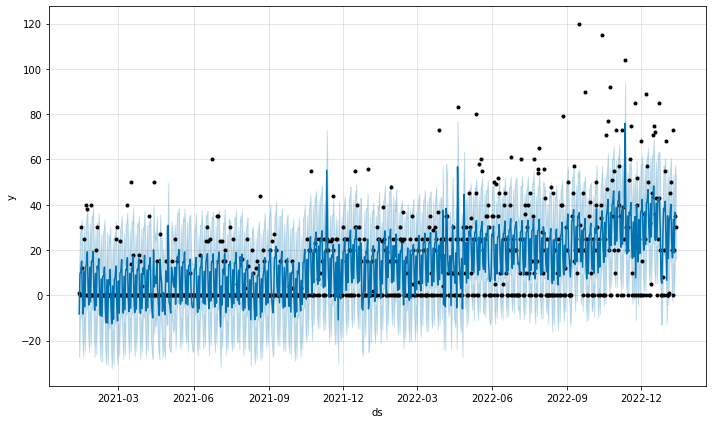

In [115]:
model.plot(train_forecast)
plt.show()

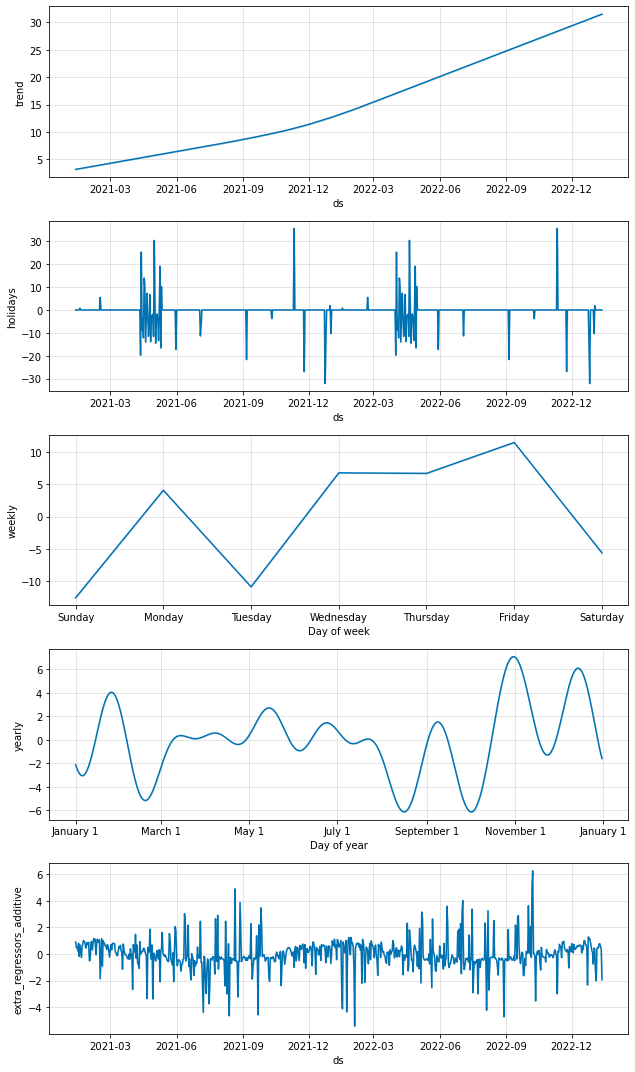

In [116]:
model.plot_components(train_forecast)
plt.show()

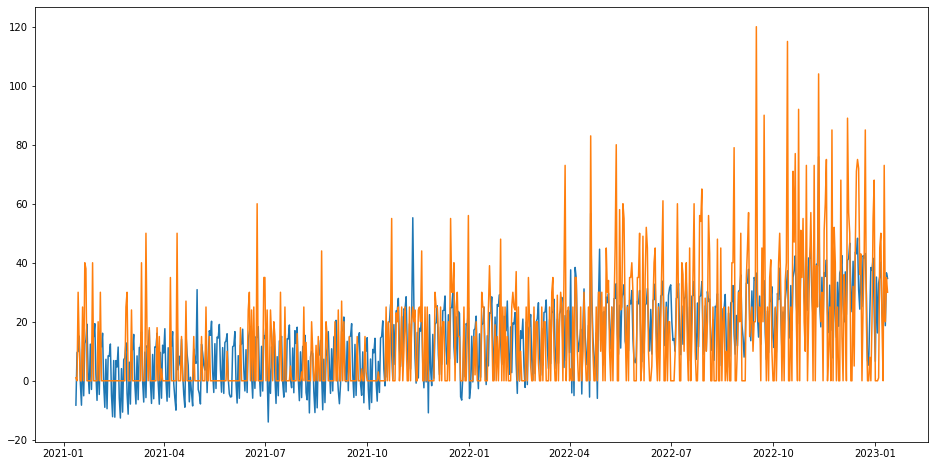

In [117]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(train_full['ds'],train_forecast['yhat'])
ax.plot(train_full['ds'],train_full['y'])
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_full['y'],train_forecast['yhat'],squared=False)

15.288962790330173

In [119]:
test_dates = test_full.drop('y',axis=1)

In [120]:
test_forecast = model.predict(test_dates)

In [121]:
print(test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 2023-01-13  40.550138   20.180258   59.548487
1 2023-01-14  26.315588    6.327513   45.511786
2 2023-01-15  19.732088   -0.279935   39.816378
3 2023-01-16  37.090738   17.257362   55.894489
4 2023-01-17  22.091348    2.399302   42.254233


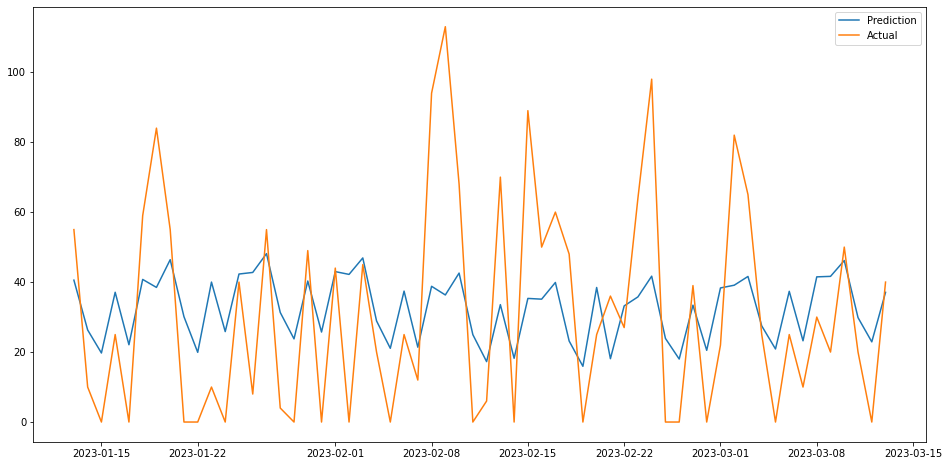

In [122]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(test_full['ds'],test_forecast['yhat'],label='Prediction')
ax.plot(test_full['ds'],test_full['y'],label='Actual')
ax.legend()
plt.show()

In [123]:
mean_squared_error(test_full['y'],test_forecast['yhat'],squared=False)

25.68822370604737

In [124]:
from fbprophet.utilities import regressor_coefficients

In [125]:
regressor_coefficients(model)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,max temp,additive,61.414501,-0.025688,-0.025688,-0.025688
1,precip,additive,0.115650,-2.332099,-2.332099,-2.332099
2,snowfall,additive,0.119973,-0.656241,-0.656241,-0.656241
3,Attendance,additive,1289.664843,0.000170,0.000170,0.000170
